In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

(4, 1)
(4,)


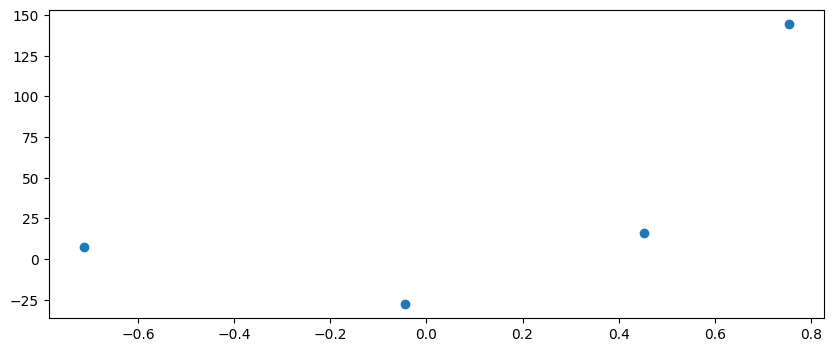

In [3]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)
print(X.shape)
print(y.shape)


plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.show()

COEFFICIENT (m) : [78.35063668]
INTERCEPT (b) : 26.15963284313262


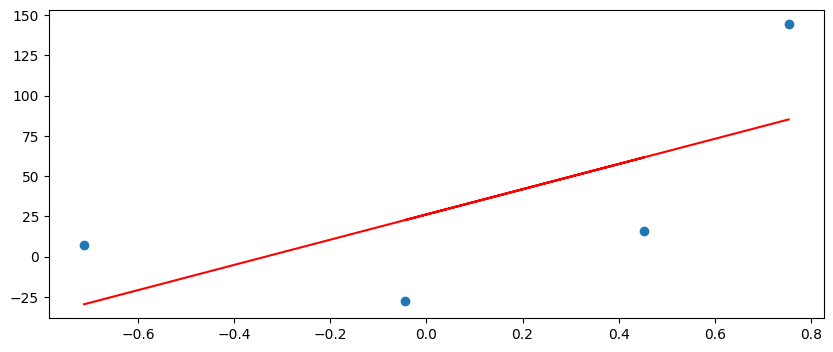

In [4]:
reg = LinearRegression()
reg.fit(X,y)

print('COEFFICIENT (m) :', reg.coef_)        # m
print('INTERCEPT (b) :', reg.intercept_)   # b

plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')
plt.show()

[ 44.18419163 135.39949674  96.51318381 159.05759577]


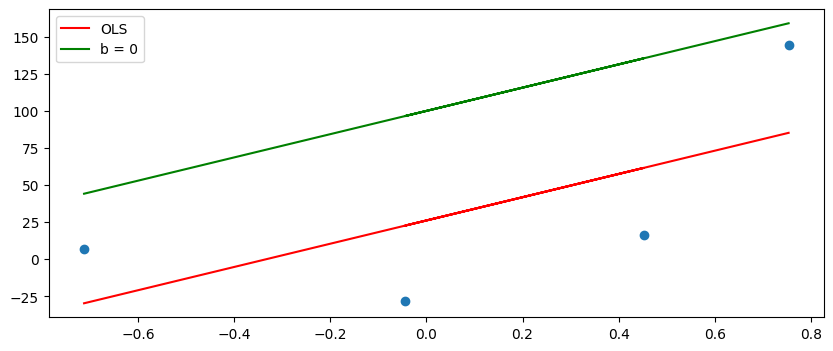

In [5]:
# applying Gradient Descent assuming slope is constant m = 78.35
# and assuming the starting value for intercept b = 0 (where x=0)
y_pred = ((78.35 * X) + 100).reshape(4) # 1 row 4 columns   # y = mx + b


print(y_pred)

plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='r',label='OLS')
plt.plot(X,y_pred,color='g',label='b = 0')
plt.legend()
plt.show()

In [6]:
print(X)
print(X.ravel())

[[-0.71239066]
 [ 0.45181234]
 [-0.04450308]
 [ 0.75376638]]
[-0.71239066  0.45181234 -0.04450308  0.75376638]


b :  85.2319408520523


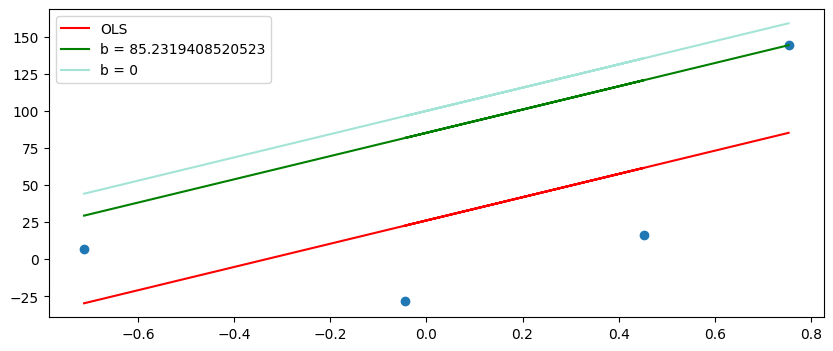

In [7]:
m = 78.35
b = 100       # keep changing the value of b here, to see the different graph scenarios
# here we have taken b at random, so that we can find a point where loss function is minimum
lr = 0.1    # keep learning rate as low as possible
n = len(y)

# --- Iteration 1 ---
y_hat1 = (m * X.ravel()) + b 
gradient_b1 = -(2/n) * np.sum(y - y_hat1) # Standard MSE Gradient
b = b - (lr * gradient_b1)      # b new = b old - (lr * slope of error)
print('b : ', b)

y_pred1 = ((m * X) + b).reshape(4)      # for easy interpretation consider m is already given as 78.35

plt.figure(figsize=(10,4))

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='g',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

LOSS SLOPE 	:  75.61246283749225
STEP SIZE 	:  7.561246283749225
NEW INTERCEPT b	: 28.050015831198824


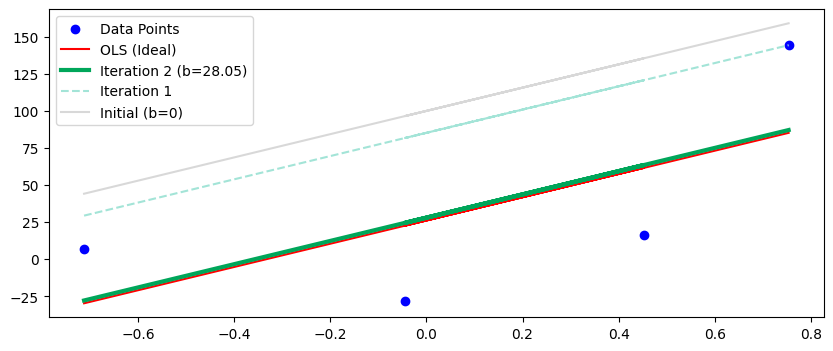

In [10]:
# --- Iteration 2 ---
# 1. Recalculate the gradient using the NEW b from Iteration 1
# We use the formula: -2 * sum(actual - predicted)
# Predicted is (m * X + b)
y_hat = (m * X.ravel() + b) 
loss_slope = -2 * np.sum(y - y_hat) 

print('LOSS SLOPE \t: ', loss_slope)

# 2. Calculate step size using your learning rate
step_size = loss_slope * lr
print('STEP SIZE \t: ', step_size)

# 3. Update the intercept (Moving downhill)
b = b - step_size
print('NEW INTERCEPT b\t:', b)

# 4. Generate new predictions for plotting
y_pred2 = ((m * X) + b).reshape(4)

# --- Visualization ---
plt.figure(figsize=(10,4))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, reg.predict(X), color='red', label='OLS (Ideal)')
plt.plot(X, y_pred2, color='#00a65a', linewidth=3, label='Iteration 2 (b={:.2f})'.format(b))
plt.plot(X, y_pred1, color='#A3E4D7', linestyle='--', label='Iteration 1')
plt.plot(X, y_pred, color='grey', alpha=0.3, label='Initial (b=0)')
plt.legend()
plt.show()

b :  27.671953517011364


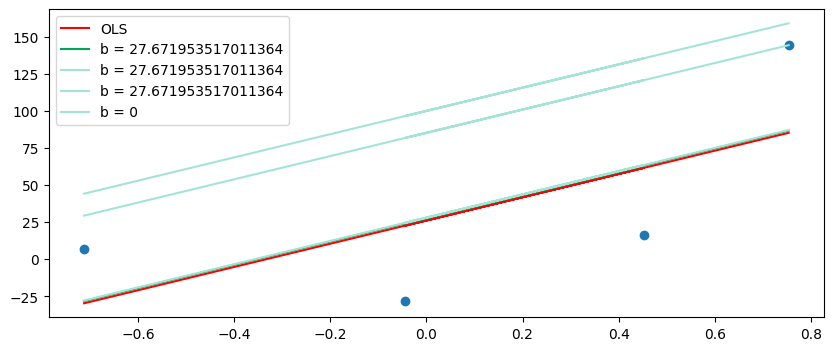

In [11]:
# --- Iteration 3 ---
y_hat3 = (m * X.ravel()) + b 
gradient_b3 = -(2/n) * np.sum(y - y_hat3)
b = b - (lr * gradient_b3)
print('b : ', b)

y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='r',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

### **Rather than finding the minimum point like this, lets use for loop to do this**

COEFFICIENT (m) : [78.35063668]
INTERCEPT (b) : 26.15963284313262
Minimum value of b :  26.438665010410737


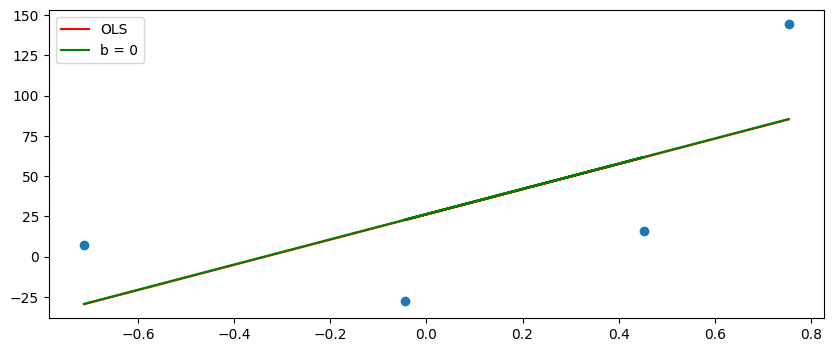

In [ ]:
m = 78.35
b = 100
lr = 0.1
loops = 25     # just keep lower the value of loops here, so that you can understand how green line moves toward the red line, and intercept line reachign to lowest minimum point 
n = len(y)

print('COEFFICIENT (m) :', reg.coef_)        # m
print('INTERCEPT (b) :', reg.intercept_)   # b

for i in range(loops):
    y_hat = (m * X.ravel()) + b
    gradient = -(2/n) * np.sum(y - y_hat)
    new_b = b - (lr * gradient)

    if new_b > b:
        new_b = b
    
    b = new_b

print('Minimum value of b : ', b)


y_pred = ((m* X) + b).reshape(4)

plt.figure(figsize=(10,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='r',label='OLS')
plt.plot(X,y_pred,color='g',label='b = 0')
plt.legend()
plt.show()

# as you can see the new value of b which is green line is completely over the red line
